In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier


# Machine Learning Modelle

In [4]:
def clean_up(df):
    x = df.drop_duplicates()
    x = x[abs(x["Cholesterol"] - x["HDL"] - x["LDL"] - x["triglyceride"] / 5) < 30]
    return x 

# Load the dataset
df = pd.read_csv("data/smoker_train.csv")
df = clean_up(df)

# store test error and train error for each model
# [model, test_mse, train_mse, test_accuracy, train_accuracy, test_f1, train_f1]
model_errors = []
DTC_model_errors = []
RFC_model_errors = []
SVM_model_errors = []

# Split the data into test and train sets
df_train, df_test_all = train_test_split(df, test_size=0.2, random_state=42)
df_test, df_test_unseen = train_test_split(df_test_all, test_size=0.5, random_state=42)

In [5]:
# reset Model Errors
model_errors = []

## Naives Modell

In [6]:
# Modell, das immer "Non-Smoker" (0) vorhersagt
y = df_train['smoking']
y_pred_naive = np.zeros_like(y)

# Fehlerwerte berechnen
accuracy = accuracy_score(y, y_pred_naive)
f1 = f1_score(y, y_pred_naive)
mse = mean_squared_error(y, y_pred_naive)

print(f"Accuracy (immer Non-Smoker): {accuracy:.4f}")
print(f"F1-Score (immer Non-Smoker): {f1:.4f}")
print(f"Mean Squared Error (immer Non-Smoker): {mse:.4f}")

# Fehlerwerte für testset berechnen
y_test = df_test['smoking']
y_test_pred_naive = np.zeros_like(y_test)
accuracy_test = accuracy_score(y_test, y_test_pred_naive)
f1_test = f1_score(y_test, y_test_pred_naive)
mse_test = mean_squared_error(y_test, y_test_pred_naive)

print(f"Test Accuracy (immer Non-Smoker): {accuracy_test:.4f}")
print(f"Test F1-Score (immer Non-Smoker): {f1_test:.4f}")
print(f"Test Mean Squared Error (immer Non-Smoker): {mse_test:.4f}")


model_errors.append(['Naive Model', mse_test, mse, accuracy_test, accuracy, f1_test, f1])
DTC_model_errors.append(['Naive Model', mse_test, mse, accuracy_test, accuracy, f1_test, f1])
RFC_model_errors.append(['Naive Model', mse_test, mse, accuracy_test, accuracy, f1_test, f1])
SVM_model_errors.append(['Naive Model', mse_test, mse, accuracy_test, accuracy, f1_test, f1])

Accuracy (immer Non-Smoker): 0.6346
F1-Score (immer Non-Smoker): 0.0000
Mean Squared Error (immer Non-Smoker): 0.3654
Test Accuracy (immer Non-Smoker): 0.6377
Test F1-Score (immer Non-Smoker): 0.0000
Test Mean Squared Error (immer Non-Smoker): 0.3623


## Linear Regression
Not relevant to smoker prediction.

In [7]:
# Use all columns except 'weight(kg)' and smoking as features
X = df_train[['height(cm)', 'waist(cm)', 'age', 'hemoglobin']]
y = df_train['weight(kg)']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training der Modelle
lr_model = LinearRegression().fit(X_train_1, y_train_1)

y_pred = lr_model.predict(X_test_1)

print(f"Intercept: {lr_model.intercept_}")
for name, coef in zip(X.columns, lr_model.coef_):
    print(f"Coefficient for {name}: {coef}")

mse = mean_squared_error(y_test_1, y_pred)
print(f"Test Mean Squared Error: {mse}")

Intercept: -83.9689289806846
Coefficient for height(cm): 0.47169242726019045
Coefficient for waist(cm): 0.9553035531900242
Coefficient for age: -0.15454570390331368
Coefficient for hemoglobin: 0.04395850868571405
Test Mean Squared Error: 23.923605625345697


# Decision Trees

## Decision Tree limited depth of 1

In [8]:

# Input Variablen
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)

# Output Variable
y = df_train['smoking']
y_test = df_test['smoking']

dtc = DecisionTreeClassifier(random_state=0, max_depth=1).fit(X, y)

# Modellanwendung
y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree max depth of 1', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
DTC_model_errors.append(['Decision Tree max depth of 1', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Decision Tree Test Accuracy: 0.6791
Decision Tree Train Accuracy: 0.6623
Decision Tree Test F1-Score: 0.6631
Decision Tree Train F1-Score: 0.6491
Decision Tree Test Mean Squared Error: 0.3209
Decision Tree Train Mean Squared Error: 0.3377


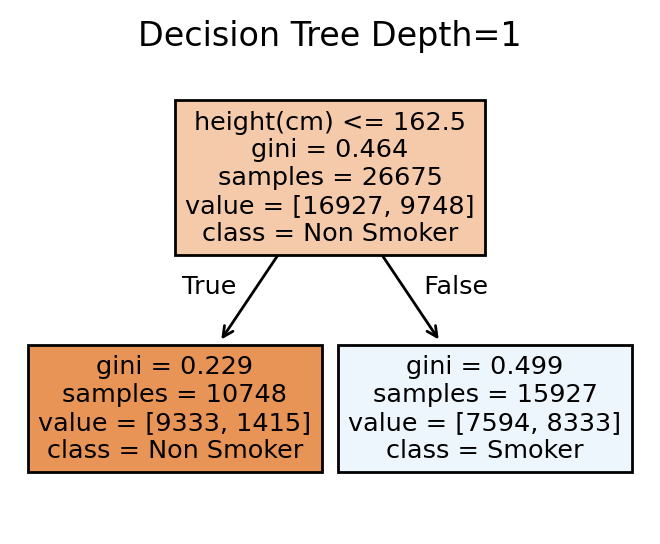

In [9]:

plt.figure(figsize=(4, 3), dpi=200)
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.title("Decision Tree Depth=1")
plt.show()

## Decision Tree

In [10]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle
dtc = DecisionTreeClassifier(random_state=0).fit(X, y)

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

# How many leafs does the tree have?
print(f"Number of leafs in the tree: {dtc.get_n_leaves()}")

# How deep is the tree?
print(f"Depth of the tree: {dtc.get_depth()}")

DTC_model_errors.append(['Decision Tree', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Decision Tree Test Accuracy: 0.6836
Decision Tree Train Accuracy: 1.0000
Decision Tree Test F1-Score: 0.5642
Decision Tree Train F1-Score: 1.0000
Decision Tree Test Mean Squared Error: 0.3164
Decision Tree Train Mean Squared Error: 0.0000
Number of leafs in the tree: 4259
Depth of the tree: 37


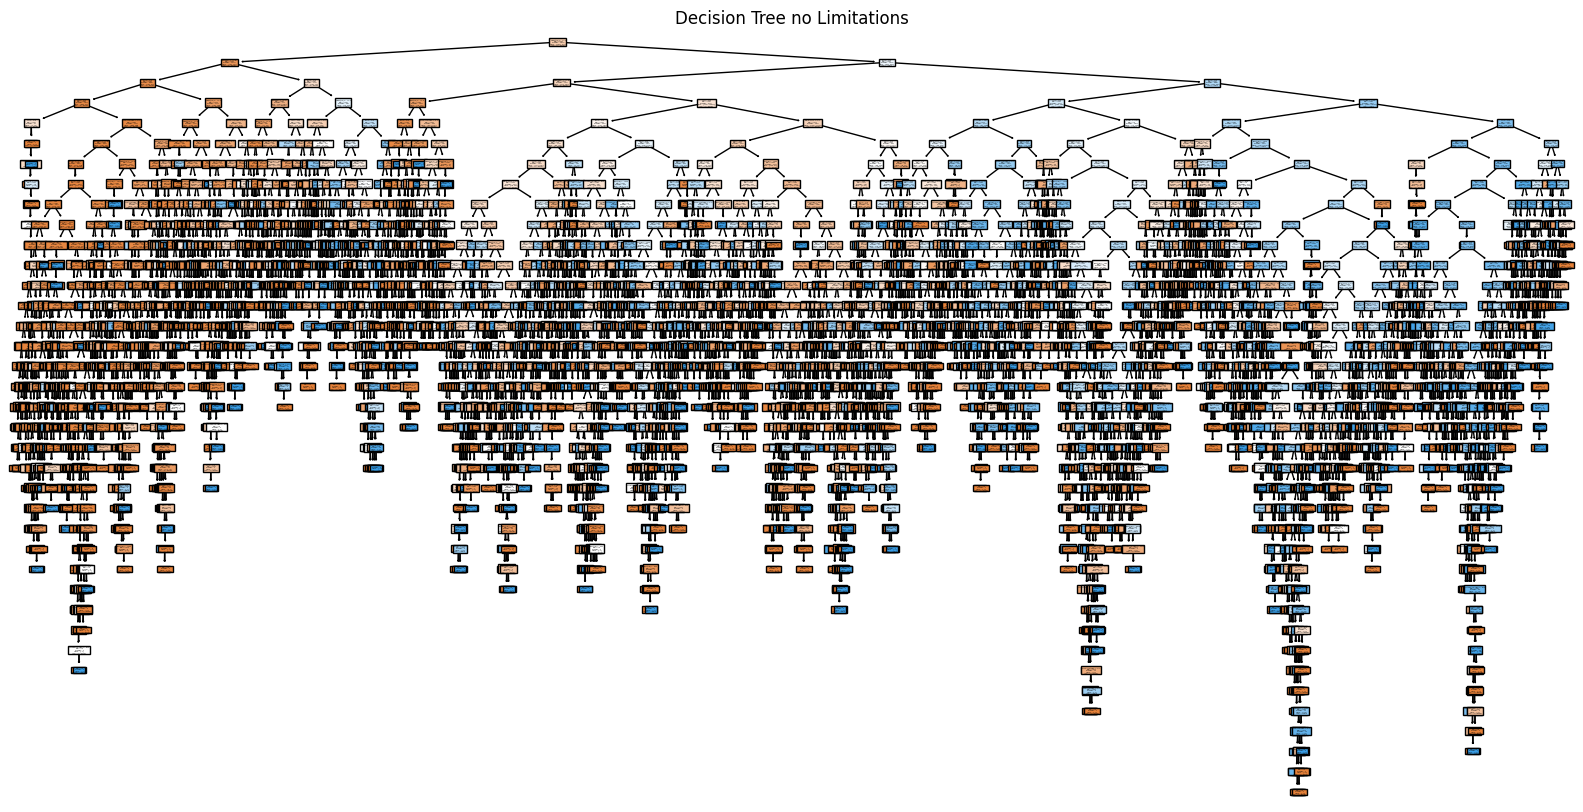

In [11]:
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.title("Decision Tree no Limitations")
plt.show()

## Decision Tree limited leaves with cross validation for hyperparameter tuning (max leaves)

In [12]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle mit K-Fold Cross-Validation
dtc = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(
    dtc, 
    param_grid={
        'max_leaf_nodes': [2, 5, 8, 9, 10, 11, 12, 17, 20]
    }, 
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Training der Modelle mit den besten Parametern
dtc = grid_search.best_estimator_

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

DTC_model_errors.append(['Decision Tree cv for max leaf', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'max_leaf_nodes': 9}
Decision Tree Test Accuracy: 0.7322
Decision Tree Train Accuracy: 0.7212
Decision Tree Test F1-Score: 0.6296
Decision Tree Train F1-Score: 0.6171
Decision Tree Test Mean Squared Error: 0.2678
Decision Tree Train Mean Squared Error: 0.2788


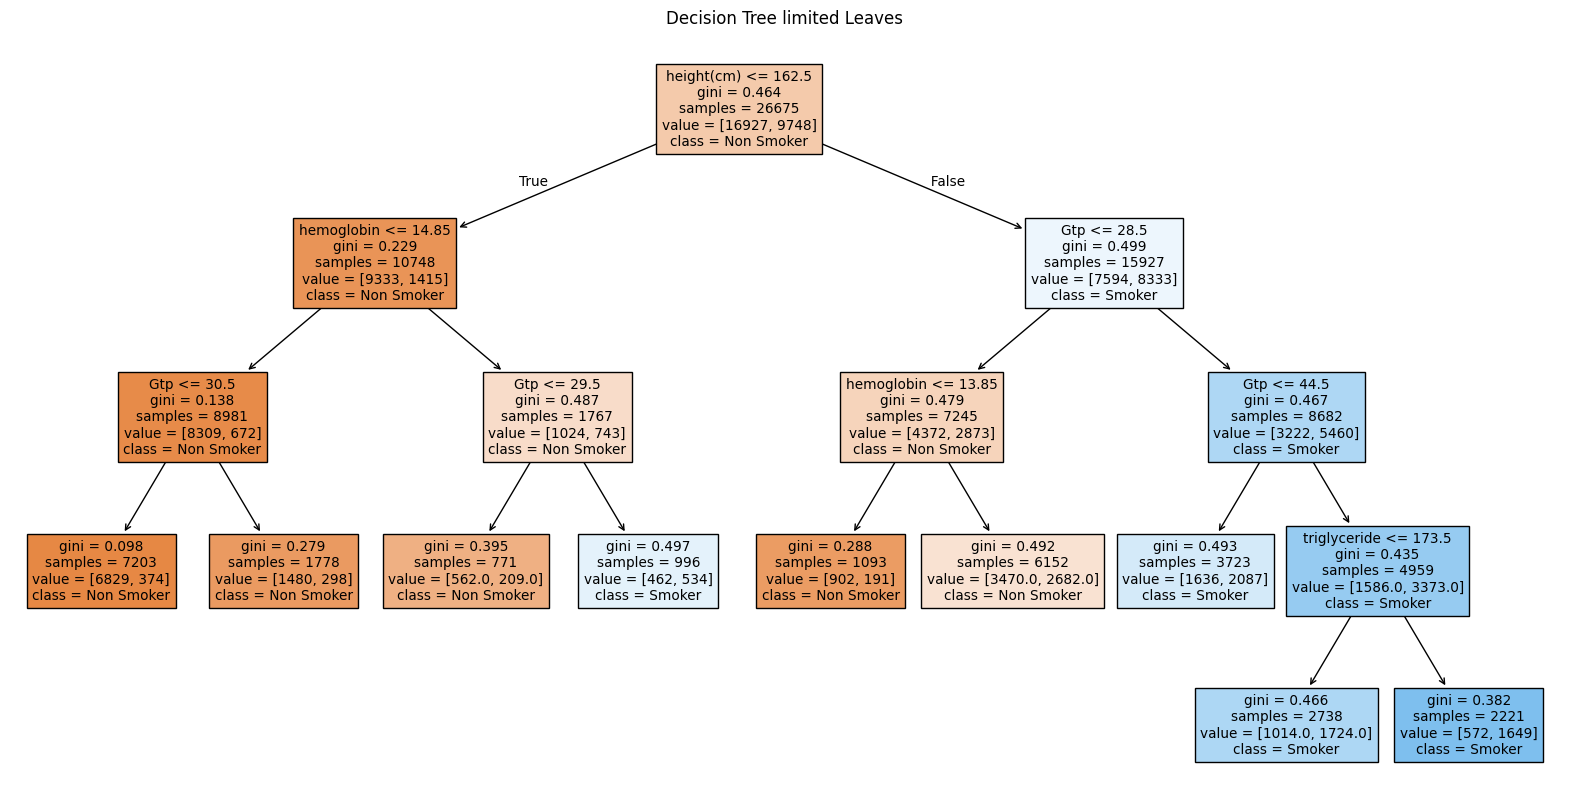

In [13]:
# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.title("Decision Tree limited Leaves")
plt.show()

## Decision Tree limited leaves with cross validation for hyperparameter tuning (max depth)

In [14]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle mit K-Fold Cross-Validation
dtc = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(
    dtc, 
    param_grid={
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    }, 
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Training der Modelle mit den besten Parametern
dtc = grid_search.best_estimator_

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree cv for max depth', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
DTC_model_errors.append(['Decision Tree cv for max depth', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'max_depth': 7}
Decision Tree Test Accuracy: 0.7352
Decision Tree Train Accuracy: 0.7498
Decision Tree Test F1-Score: 0.6455
Decision Tree Train F1-Score: 0.6703
Decision Tree Test Mean Squared Error: 0.2648
Decision Tree Train Mean Squared Error: 0.2502


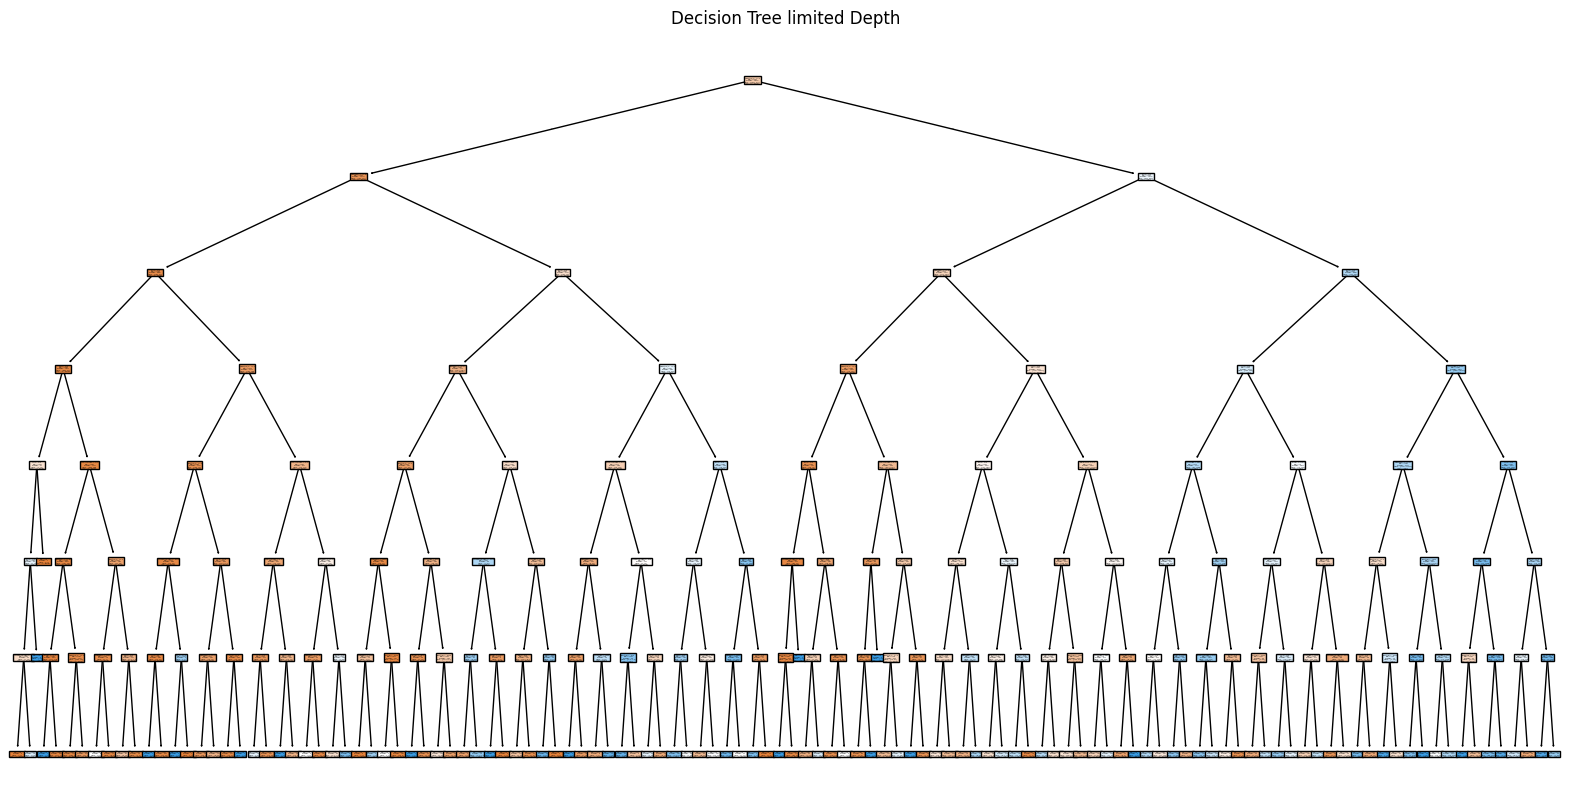

In [15]:
# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.title("Decision Tree limited Depth")
plt.show()

## Decision Tree limited leaves with cross validation for hyperparameter tuning (ccp_alpha)

In [16]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle mit K-Fold Cross-Validation
dtc = DecisionTreeClassifier(random_state=0).fit(X, y)


path = dtc.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas

grid_search = GridSearchCV(
    dtc, 
    param_grid={
        'ccp_alpha': ccp_alphas
    }, 
    cv=5,
    scoring='accuracy'
    
)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Training der Modelle mit den besten Parametern
dtc = grid_search.best_estimator_

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

DTC_model_errors.append(['Decision Tree cv for ccp_alpha', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'ccp_alpha': np.float64(0.00023912420333822385)}
Decision Tree Test Accuracy: 0.7328
Decision Tree Train Accuracy: 0.7448
Decision Tree Test F1-Score: 0.6155
Decision Tree Train F1-Score: 0.6356
Decision Tree Test Mean Squared Error: 0.2672
Decision Tree Train Mean Squared Error: 0.2552


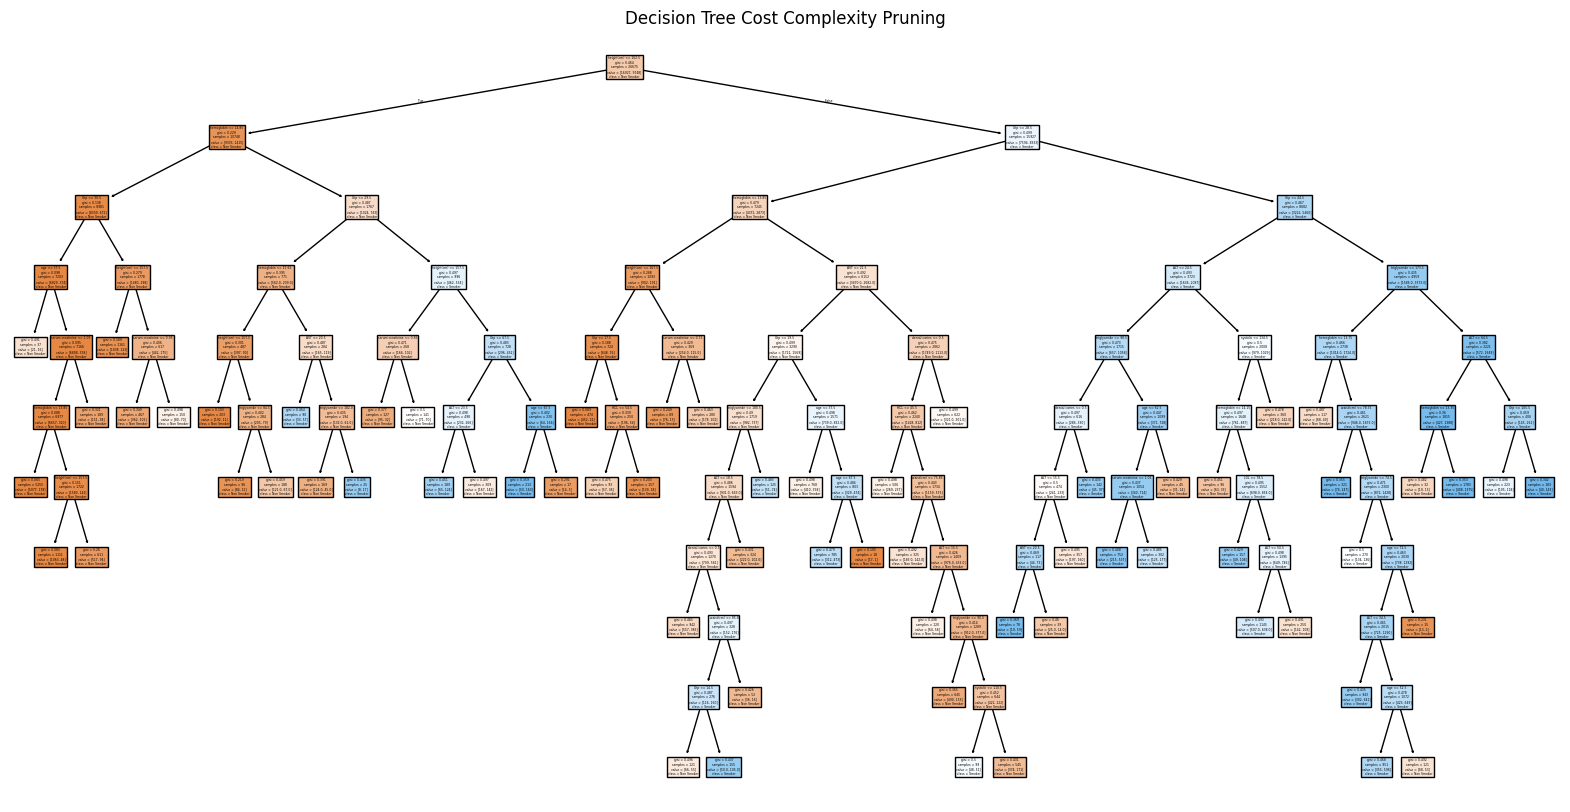

In [17]:
# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.title("Decision Tree Cost Complexity Pruning")
plt.show()

## Evaluation

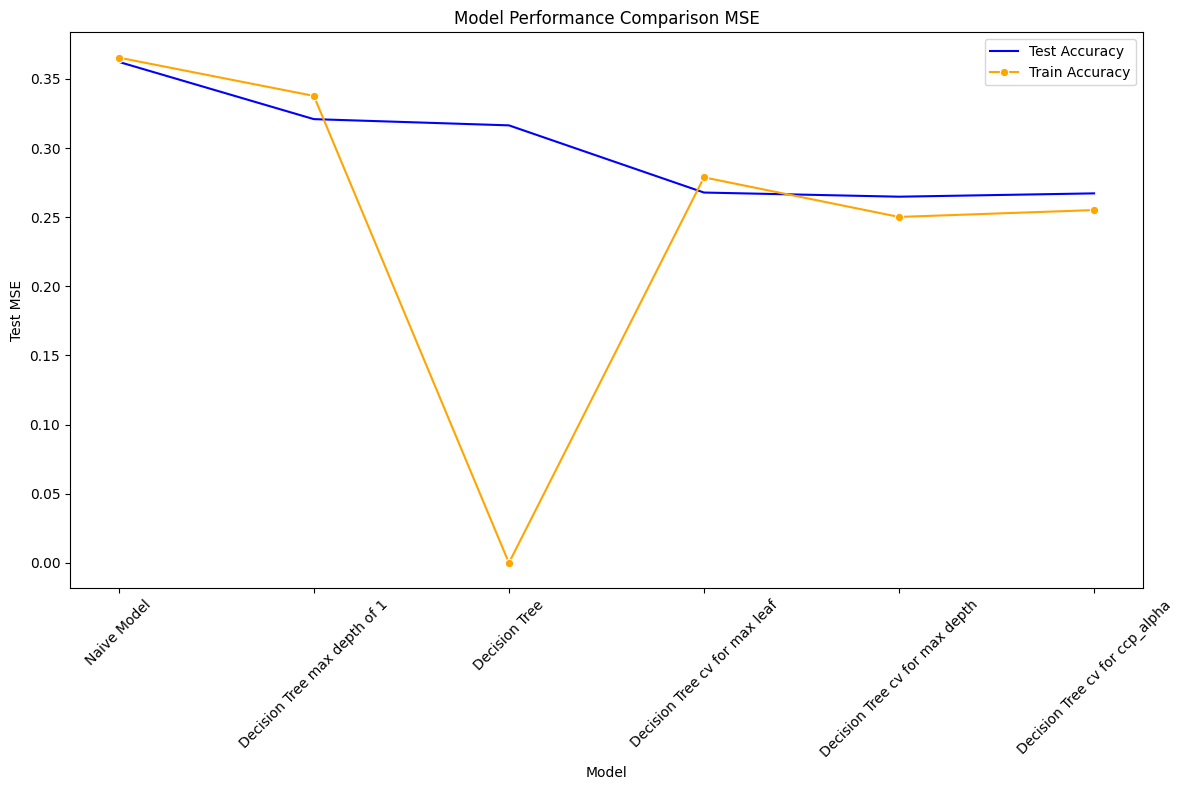

In [18]:
# Visualize model errors
model_errors_df = pd.DataFrame(DTC_model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test MSE', data=model_errors_df, color='blue', label='Test Accuracy')
sns.lineplot(x='Model', y='Train MSE', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison MSE')
plt.legend()
plt.tight_layout()
plt.show()

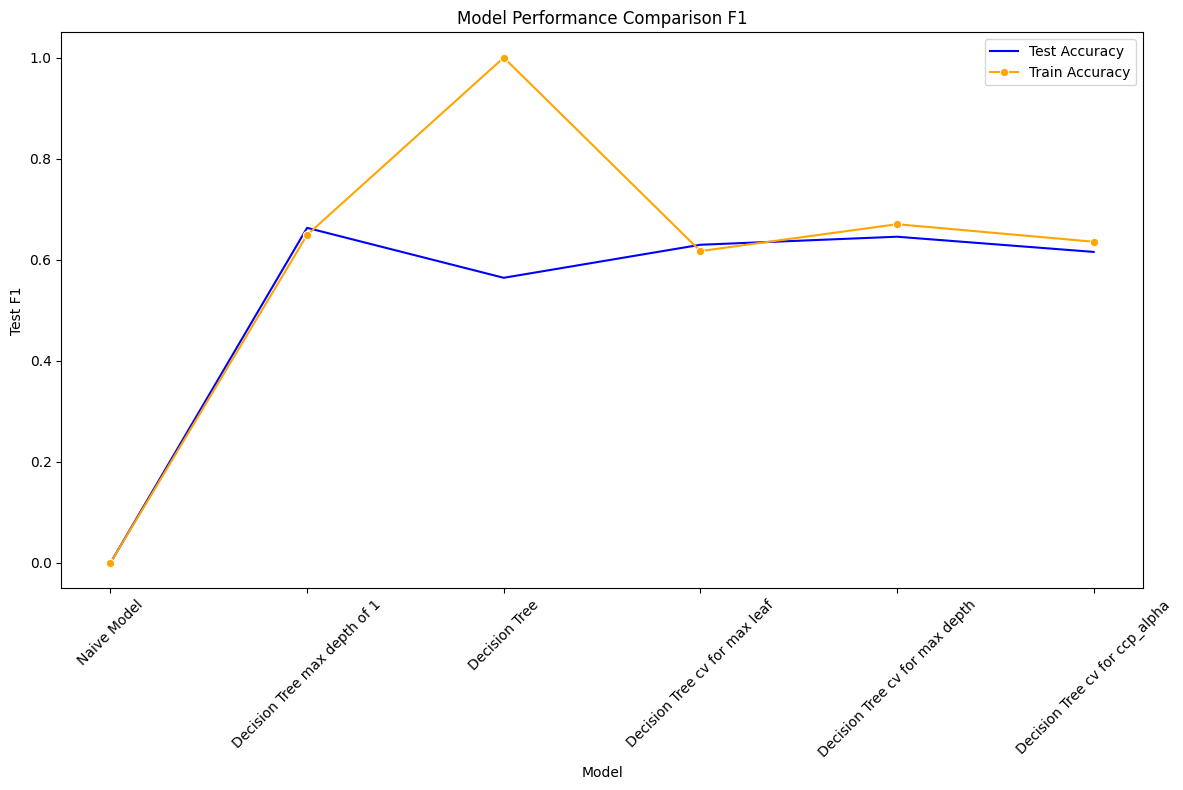

In [19]:
# Visualize model errors
model_errors_df = pd.DataFrame(DTC_model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test F1', data=model_errors_df, color='blue', label='Test Accuracy')
sns.lineplot(x='Model', y='Train F1', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison F1')
plt.legend()
plt.tight_layout()
plt.show()

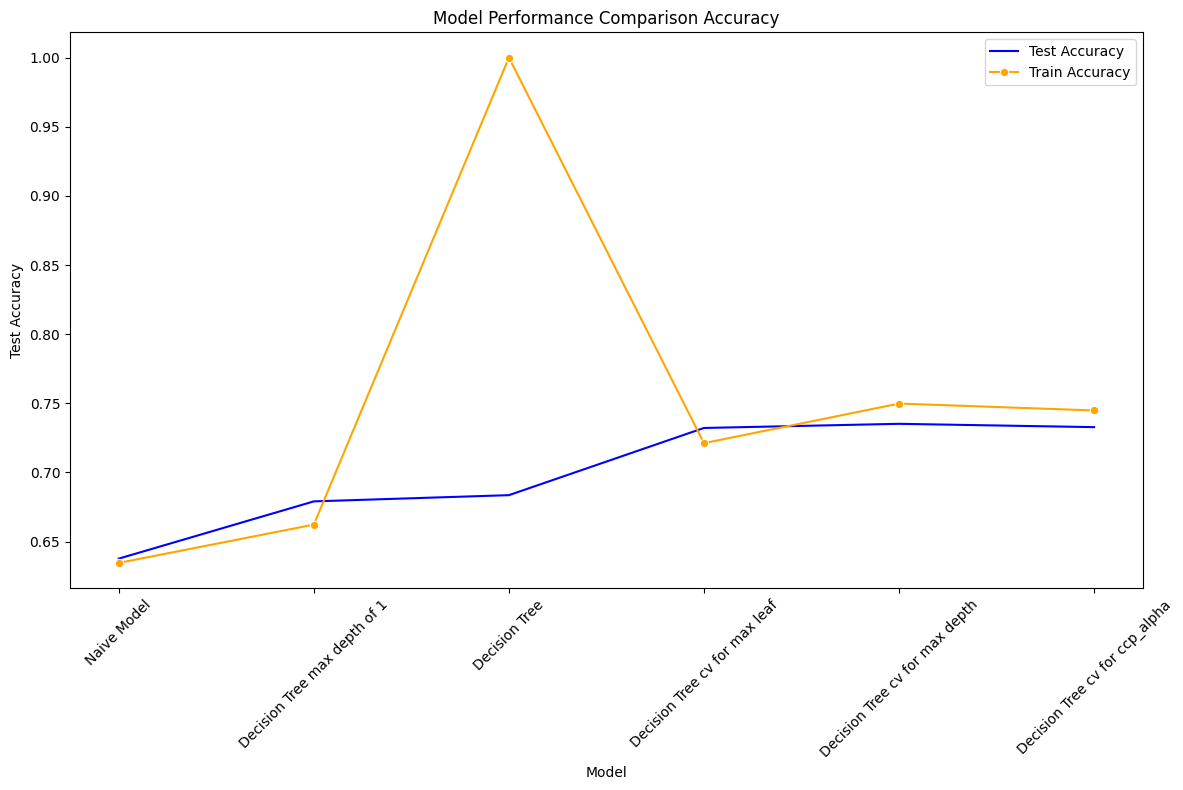

In [20]:
# Visualize model errors
model_errors_df = pd.DataFrame(DTC_model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test Accuracy', data=model_errors_df, color='blue', label='Test Accuracy')
sns.lineplot(x='Model', y='Train Accuracy', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

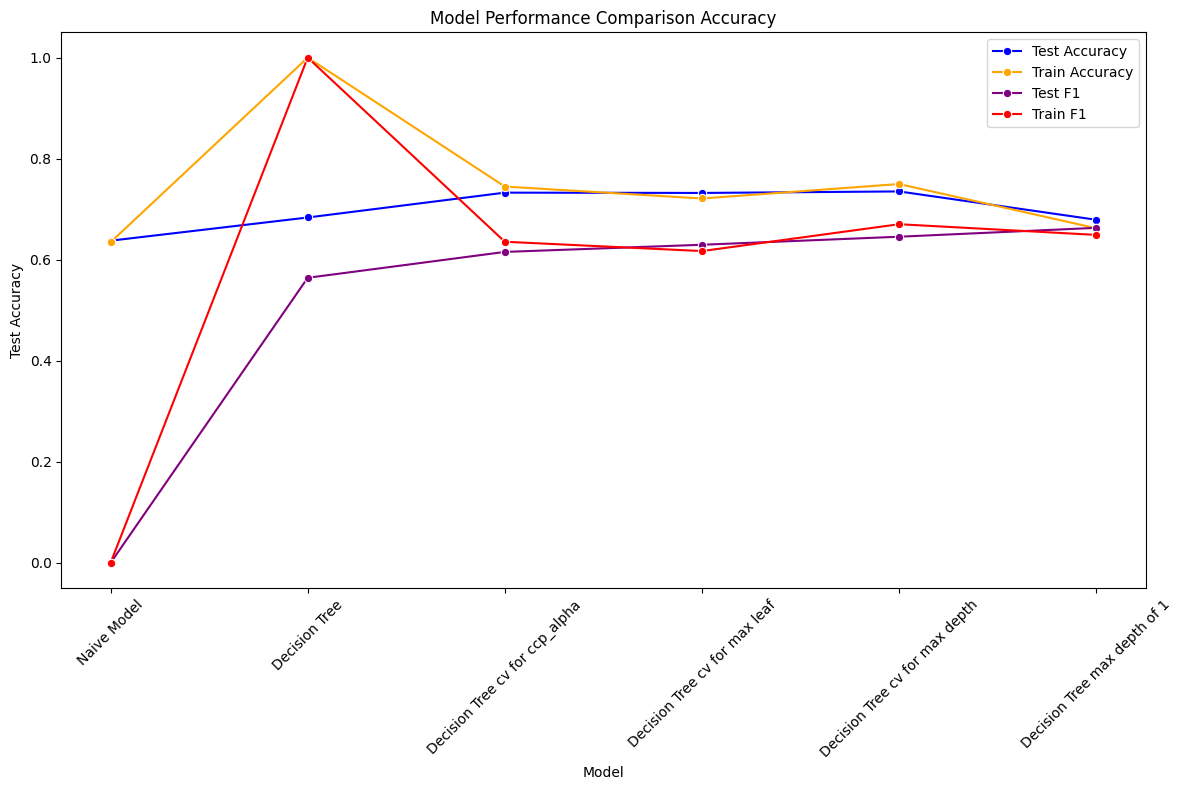

In [21]:
# Visualize model errors
model_errors_df = pd.DataFrame(DTC_model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])

# Sortierung nach Test Accuracy (aufsteigend)
model_errors_df = model_errors_df.sort_values(by='Test F1', ascending=True)
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test Accuracy', data=model_errors_df, color='blue', label='Test Accuracy', marker='o')
sns.lineplot(x='Model', y='Train Accuracy', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
sns.lineplot(x='Model', y='Test F1', data=model_errors_df, color='purple', label='Test F1', marker='o')
sns.lineplot(x='Model', y='Train F1', data=model_errors_df, color='red', label='Train F1', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Random Forest

## Random forest no tuning

In [22]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell trainieren
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X, y)

# Vorhersagen berechnen
y_pred_train = rfc.predict(X)
y_pred = rfc.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")

# Anzahl der genutzten Bäume
print(f"Number of trees in the forest: {len(rfc.estimators_)}")

# Durchschnittliche Tiefe der Bäume ausgeben
tree_depths = [estimator.tree_.max_depth for estimator in rfc.estimators_]
avg_depth = sum(tree_depths) / len(tree_depths)
print(f"Average depth of the trees: {avg_depth:.2f}")

# Modellfehlerliste ergänzen
RFC_model_errors.append(['Random Forest', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Random Forest Test Accuracy: 0.7543
Random Forest Train Accuracy: 1.0000
Random Forest Test F1-Score: 0.6543
Random Forest Train F1-Score: 1.0000
Random Forest Test Mean Squared Error: 0.2457
Random Forest Train Mean Squared Error: 0.0000
Number of trees in the forest: 100
Average depth of the trees: 34.10


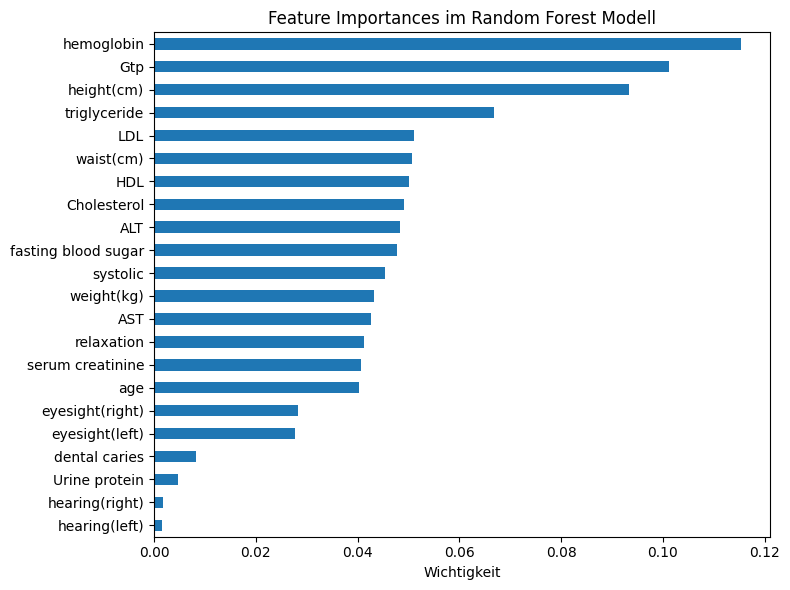

In [23]:
# Feature Importances
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances im Random Forest Modell")
plt.xlabel("Wichtigkeit")
plt.tight_layout()
plt.show()

## Random Forest cross validation hyperparametertuning n_estimators

In [24]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell definieren
rfc = RandomForestClassifier(random_state=0)

# Hyperparameter Grid definieren
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

# GridSearch mit Cross-Validation
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

# Beste Parameter anzeigen
print("Best parameters found: ", grid_search.best_params_)

# Bestes Modell verwenden
rfc_best = grid_search.best_estimator_

# Vorhersagen berechnen
y_pred_train = rfc_best.predict(X)
y_pred = rfc_best.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")

# Anzahl Bäume im besten Modell
print(f"Number of trees in the best model: {rfc_best.n_estimators}")

# Durchschnittliche Tiefe der Bäume ausgeben
tree_depths = [estimator.tree_.max_depth for estimator in rfc_best.estimators_]
avg_depth = sum(tree_depths) / len(tree_depths)
print(f"Average depth of the trees: {avg_depth:.2f}")

# Modellfehlerliste ergänzen
RFC_model_errors.append(['Random Forest cv for n_estimators<300', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'n_estimators': 250}
Random Forest Test Accuracy: 0.7546
Random Forest Train Accuracy: 1.0000
Random Forest Test F1-Score: 0.6575
Random Forest Train F1-Score: 1.0000
Random Forest Test Mean Squared Error: 0.2454
Random Forest Train Mean Squared Error: 0.0000
Number of trees in the best model: 250
Average depth of the trees: 33.89


In [25]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell definieren
rfc = RandomForestClassifier(random_state=0)

# Hyperparameter Grid definieren
param_grid = {
    'n_estimators': [400, 500, 600, 700, 800]
}

# GridSearch mit Cross-Validation
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

# Beste Parameter anzeigen
print("Best parameters found: ", grid_search.best_params_)

# Bestes Modell verwenden
rfc_best = grid_search.best_estimator_

# Vorhersagen berechnen
y_pred_train = rfc_best.predict(X)
y_pred = rfc_best.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")

# Anzahl Bäume im besten Modell
print(f"Number of trees in the best model: {rfc_best.n_estimators}")

# Durchschnittliche Tiefe der Bäume ausgeben
tree_depths = [estimator.tree_.max_depth for estimator in rfc_best.estimators_]
avg_depth = sum(tree_depths) / len(tree_depths)
print(f"Average depth of the trees: {avg_depth:.2f}")

# Modellfehlerliste ergänzen
RFC_model_errors.append(['Random Forest cv for n_estimators>300', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'n_estimators': 800}
Random Forest Test Accuracy: 0.7510
Random Forest Train Accuracy: 1.0000
Random Forest Test F1-Score: 0.6521
Random Forest Train F1-Score: 1.0000
Random Forest Test Mean Squared Error: 0.2490
Random Forest Train Mean Squared Error: 0.0000
Number of trees in the best model: 800
Average depth of the trees: 33.81


## Random Forest cross validation hyperparametertuning max depth

In [26]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell definieren
rfc = RandomForestClassifier(random_state=0, n_estimators=700)

# Hyperparameter Grid definieren
param_grid = {
    'max_depth': [10, 20, 30, 40, 50]
}

# GridSearch mit Cross-Validation
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

# Beste Parameter anzeigen
print("Best parameters found: ", grid_search.best_params_)

# Bestes Modell verwenden
rfc_best = grid_search.best_estimator_

# Vorhersagen berechnen
y_pred_train = rfc_best.predict(X)
y_pred = rfc_best.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")

# Anzahl Bäume im besten Modell
print(f"Number of trees in the best model: {rfc_best.n_estimators}")

# Durchschnittliche Tiefe der Bäume ausgeben
tree_depths = [estimator.tree_.max_depth for estimator in rfc_best.estimators_]
avg_depth = sum(tree_depths) / len(tree_depths)
print(f"Average depth of the trees: {avg_depth:.2f}")

# Modellfehlerliste ergänzen
RFC_model_errors.append(['Random Forest cv for max_depth', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'max_depth': 20}
Random Forest Test Accuracy: 0.7487
Random Forest Train Accuracy: 0.9973
Random Forest Test F1-Score: 0.6511
Random Forest Train F1-Score: 0.9963
Random Forest Test Mean Squared Error: 0.2513
Random Forest Train Mean Squared Error: 0.0027
Number of trees in the best model: 700
Average depth of the trees: 20.00


## Random Forest cross validation hyperparametertuning max features

In [27]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell definieren
rfc = RandomForestClassifier(random_state=0, n_estimators=700, max_depth=40)

# Hyperparameter Grid definieren
param_grid = {
    'max_features': ['sqrt', 3, 5, 10]
}

# GridSearch mit Cross-Validation
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

# Beste Parameter anzeigen
print("Best parameters found: ", grid_search.best_params_)

# Bestes Modell verwenden
rfc_best = grid_search.best_estimator_

# Vorhersagen berechnen
y_pred_train = rfc_best.predict(X)
y_pred = rfc_best.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")

# Anzahl Bäume im besten Modell
print(f"Number of trees in the best model: {rfc_best.n_estimators}")

# Durchschnittliche Tiefe der Bäume ausgeben
tree_depths = [estimator.tree_.max_depth for estimator in rfc_best.estimators_]
avg_depth = sum(tree_depths) / len(tree_depths)
print(f"Average depth of the trees: {avg_depth:.2f}")

# Modellfehlerliste ergänzen
RFC_model_errors.append(['Random Forest cv for max_features', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'max_features': 3}
Random Forest Test Accuracy: 0.7546
Random Forest Train Accuracy: 1.0000
Random Forest Test F1-Score: 0.6566
Random Forest Train F1-Score: 1.0000
Random Forest Test Mean Squared Error: 0.2454
Random Forest Train Mean Squared Error: 0.0000
Number of trees in the best model: 700
Average depth of the trees: 34.54


## Random Forest cross validation hyperparametertuning min samples leaf

In [28]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell definieren
rfc = RandomForestClassifier(random_state=0, n_estimators=700, max_depth=40, max_features='sqrt')


# Parameter Grid für min_samples_leaf
param_grid = {
    'min_samples_leaf': [1, 2, 5, 10, 20, 50]
}

# GridSearchCV Setup
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit Cross-Validation
grid_search.fit(X, y)

# Beste Parameter anzeigen
print("Best parameters found: ", grid_search.best_params_)

# Bestes Modell verwenden
rfc_best = grid_search.best_estimator_

# Vorhersagen berechnen
y_pred_train = rfc_best.predict(X)
y_pred = rfc_best.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")

# Anzahl Bäume im besten Modell
print(f"Number of trees in the best model: {rfc_best.n_estimators}")

# Durchschnittliche Tiefe der Bäume ausgeben
tree_depths = [estimator.tree_.max_depth for estimator in rfc_best.estimators_]
avg_depth = sum(tree_depths) / len(tree_depths)
print(f"Average depth of the trees: {avg_depth:.2f}")

# Modellfehlerliste ergänzen
model_errors.append(['Random Forest cv for min_samples_leaf', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
RFC_model_errors.append(['Random Forest cv for min_samples_leaf', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'min_samples_leaf': 5}
Random Forest Test Accuracy: 0.7504
Random Forest Train Accuracy: 0.9472
Random Forest Test F1-Score: 0.6510
Random Forest Train F1-Score: 0.9262
Random Forest Test Mean Squared Error: 0.2496
Random Forest Train Mean Squared Error: 0.0528
Number of trees in the best model: 700
Average depth of the trees: 28.37


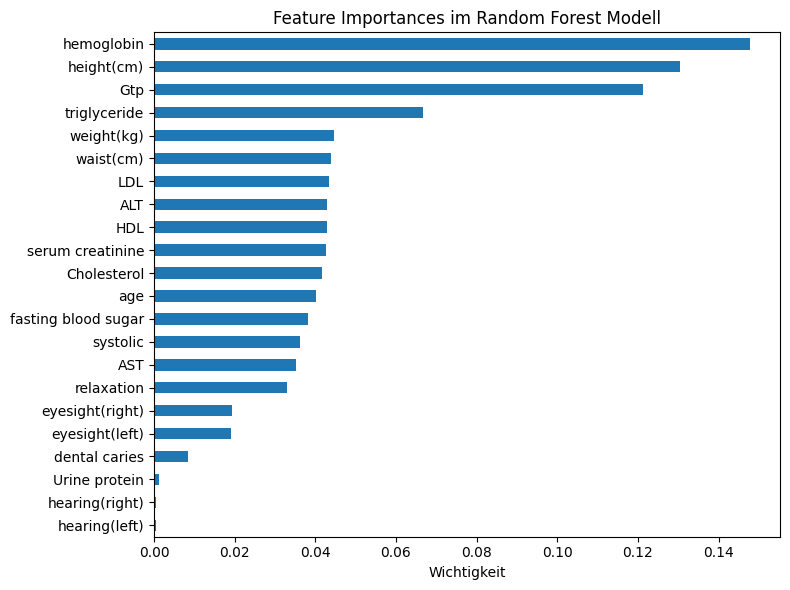

In [29]:
# Feature Importances
feat_importances = pd.Series(rfc_best.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances im Random Forest Modell")
plt.xlabel("Wichtigkeit")
plt.tight_layout()
plt.show()

## Evaluation

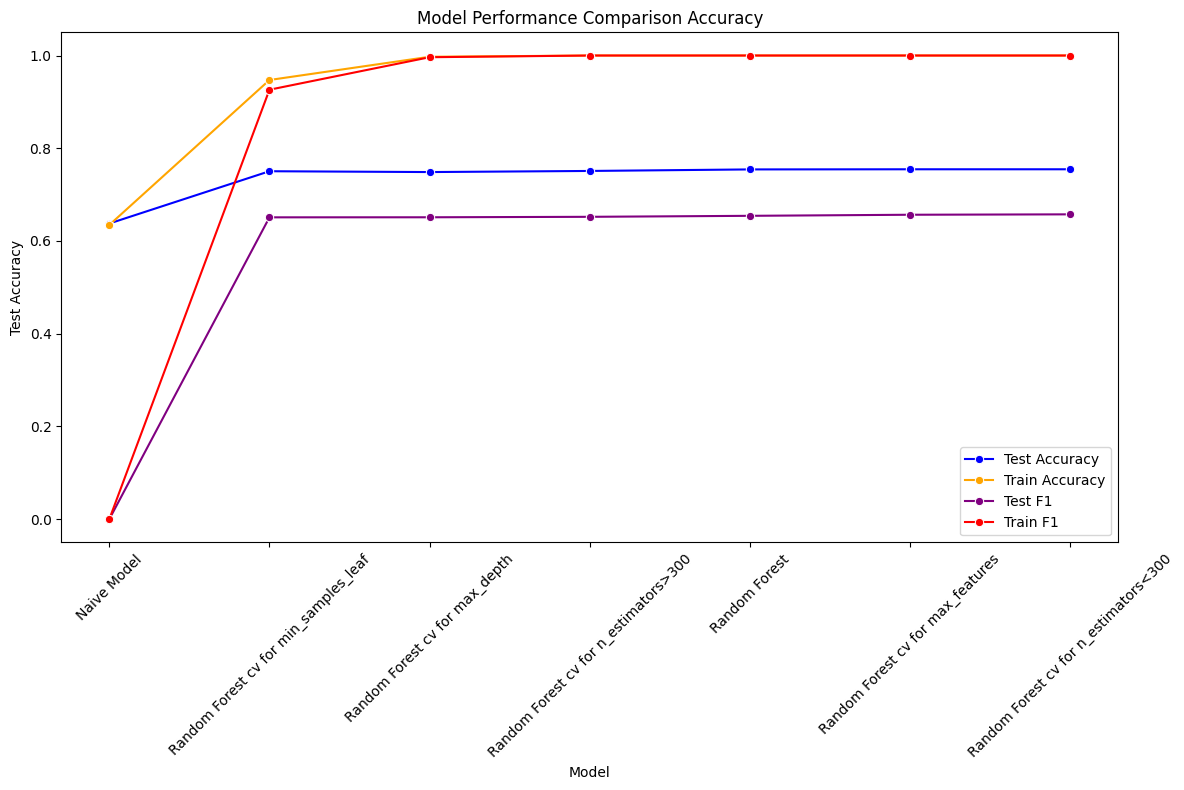

In [30]:
# Visualize model errors
model_errors_df = pd.DataFrame(RFC_model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])

# Sortierung nach Test Accuracy (aufsteigend)
model_errors_df = model_errors_df.sort_values(by='Test F1', ascending=True)
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test Accuracy', data=model_errors_df, color='blue', label='Test Accuracy', marker='o')
sns.lineplot(x='Model', y='Train Accuracy', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
sns.lineplot(x='Model', y='Test F1', data=model_errors_df, color='purple', label='Test F1', marker='o')
sns.lineplot(x='Model', y='Train F1', data=model_errors_df, color='red', label='Train F1', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

## Testing Model on unseen Data

In [31]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test_unseen.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test_unseen['smoking']

# Random Forest Modell trainieren
rfc = RandomForestClassifier(random_state=0, n_estimators=700, max_depth=40, max_features='sqrt', min_samples_leaf=1)
rfc.fit(X, y)

# Vorhersagen berechnen
y_pred_train = rfc.predict(X)
y_pred = rfc.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")


Random Forest Test Accuracy: 0.7589
Random Forest Train Accuracy: 1.0000
Random Forest Test F1-Score: 0.6702
Random Forest Train F1-Score: 1.0000
Random Forest Test Mean Squared Error: 0.2411
Random Forest Train Mean Squared Error: 0.0000


## Model for Export


In [ ]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell trainieren
rfc = RandomForestClassifier(random_state=0, n_estimators=700, max_depth=40, max_features='sqrt', min_samples_leaf=1)
rfc.fit(X, y)

# Speichern des trainierten Random Forest Modells
joblib.dump(rfc, 'smoker_rfc_model.joblib')

# SVM

## SVM Modell with cross validation for hyperparameter tuning (C, kernel, gamma)

In [33]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# SVM-Modell
svm = SVC(random_state=0)

# Grid mit Parametern – einfache Auswahl für Demo-Zwecke
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Cross-Validation mit 5 Folds
grid_search = GridSearchCV(
    svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Modell mit besten Parametern
svm_best = grid_search.best_estimator_

# Vorhersagen
y_pred_train = svm_best.predict(X)
y_pred = svm_best.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

# Fehlerliste ergänzen
SVM_model_errors.append(['SVM cv for C/kernel/gamma', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Test Accuracy: 0.7490
SVM Train Accuracy: 0.7441
SVM Test F1-Score: 0.6272
SVM Train F1-Score: 0.6250
SVM Test Mean Squared Error: 0.2510
SVM Train Mean Squared Error: 0.2559


### Output Parameter tuning
Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Test Accuracy: 0.7242
SVM Train Accuracy: 0.7493
SVM Test F1-Score: 0.6034
SVM Train F1-Score: 0.6291
SVM Test Mean Squared Error: 0.2758
SVM Train Mean Squared Error: 0.2507

## SVM Modell with cross validation for hyperparameter tuning (C)

In [34]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# SVM-Modell
svm = SVC(random_state=0, gamma='scale', kernel='rbf')

# Grid mit Parametern – einfache Auswahl für Demo-Zwecke
param_grid = {
    'C': [5, 10, 15, 20],
}

# Cross-Validation mit 5 Folds
grid_search = GridSearchCV(
    svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Modell mit besten Parametern
svm_best = grid_search.best_estimator_

# Vorhersagen
y_pred_train = svm_best.predict(X)
y_pred = svm_best.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

# Fehlerliste ergänzen
SVM_model_errors.append(['SVM cv for C<20', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])


Best parameters found:  {'C': 20}
SVM Test Accuracy: 0.7513
SVM Train Accuracy: 0.7468
SVM Test F1-Score: 0.6343
SVM Train F1-Score: 0.6330
SVM Test Mean Squared Error: 0.2487
SVM Train Mean Squared Error: 0.2532


### Output parameter tuning
Best parameters found:  {'C': 20}
SVM Test Accuracy: 0.7227
SVM Train Accuracy: 0.7519
SVM Test F1-Score: 0.6041
SVM Train F1-Score: 0.6364
SVM Test Mean Squared Error: 0.2773
SVM Train Mean Squared Error: 0.2481

## SVM Modell with cross validation for hyperparameter tuning (C)

In [35]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# SVM-Modell
svm = SVC(random_state=0, gamma='scale', kernel='rbf')

# Grid mit Parametern – einfache Auswahl für Demo-Zwecke
param_grid = {
    'C': [20, 25, 30],
}

# Cross-Validation mit 5 Folds
grid_search = GridSearchCV(
    svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Modell mit besten Parametern
svm_best = grid_search.best_estimator_

# Vorhersagen
y_pred_train = svm_best.predict(X)
y_pred = svm_best.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

# Fehlerliste ergänzen
SVM_model_errors.append(['SVM cv for C>20', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
model_errors.append(['SVM cv for C>20', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'C': 20}
SVM Test Accuracy: 0.7513
SVM Train Accuracy: 0.7468
SVM Test F1-Score: 0.6343
SVM Train F1-Score: 0.6330
SVM Test Mean Squared Error: 0.2487
SVM Train Mean Squared Error: 0.2532


## SVM Modell Hyperparamter tuned with limited Columns

In [36]:
# Daten vorbereiten
X = df_train[['height(cm)', 'hemoglobin', 'Gtp', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol']]
X_test = df_test[['height(cm)', 'hemoglobin', 'Gtp', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol']]
y = df_train['smoking']
y_test = df_test['smoking']


# Train the SVC model
svc_model = SVC(random_state=42, kernel='rbf', C=10, gamma='scale')
svc_model.fit(X, y)

# Make predictions
y_pred_train = svc_model.predict(X)
y_pred = svc_model.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

SVM_model_errors.append(['SVM best Parameter limited Columns', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])


SVM Test Accuracy: 0.7340
SVM Train Accuracy: 0.7266
SVM Test F1-Score: 0.6118
SVM Train F1-Score: 0.6019
SVM Test Mean Squared Error: 0.2660
SVM Train Mean Squared Error: 0.2734


## SVM Modell

In [37]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']


# Train the SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X, y)

# Make predictions
y_pred_train = svc_model.predict(X)
y_pred = svc_model.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

SVM_model_errors.append(['SVM', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

SVM Test Accuracy: 0.7361
SVM Train Accuracy: 0.7281
SVM Test F1-Score: 0.5899
SVM Train F1-Score: 0.5826
SVM Test Mean Squared Error: 0.2639
SVM Train Mean Squared Error: 0.2719


## SVM Linear Kernel Model

In [38]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']


# Train the SVC model
svc_model = LinearSVC(random_state=42)
svc_model.fit(X, y)

# Make predictions
y_pred_train = svc_model.predict(X)
y_pred = svc_model.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

SVM_model_errors.append(['SVM Linear', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

SVM Test Accuracy: 0.7322
SVM Train Accuracy: 0.7210
SVM Test F1-Score: 0.6054
SVM Train F1-Score: 0.5939
SVM Test Mean Squared Error: 0.2678
SVM Train Mean Squared Error: 0.2790


## SVM Modell limited columns

In [39]:
# Daten vorbereiten
X = df_train[['height(cm)', 'hemoglobin', 'Gtp']]
X_test = df_test[['height(cm)', 'hemoglobin', 'Gtp']]
y = df_train['smoking']
y_test = df_test['smoking']


# Train the SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X, y)

# Make predictions
y_pred_train = svc_model.predict(X)
y_pred = svc_model.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

SVM_model_errors.append(['SVM limited Columns', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

SVM Test Accuracy: 0.7256
SVM Train Accuracy: 0.7199
SVM Test F1-Score: 0.5778
SVM Train F1-Score: 0.5758
SVM Test Mean Squared Error: 0.2744
SVM Train Mean Squared Error: 0.2801


## SVM Linear Kernel Modell limited columns

In [40]:
# Daten vorbereiten
X = df_train[['height(cm)', 'hemoglobin', 'Gtp']]
X_test = df_test[['height(cm)', 'hemoglobin', 'Gtp']]
y = df_train['smoking']
y_test = df_test['smoking']


# Train the SVC model
svc_model = LinearSVC(random_state=42)
svc_model.fit(X, y)

# Make predictions
y_pred_train = svc_model.predict(X)
y_pred = svc_model.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

SVM_model_errors.append(['SVM Linear Kernel limited Columns', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

SVM Test Accuracy: 0.7067
SVM Train Accuracy: 0.7016
SVM Test F1-Score: 0.5665
SVM Train F1-Score: 0.5649
SVM Test Mean Squared Error: 0.2933
SVM Train Mean Squared Error: 0.2984


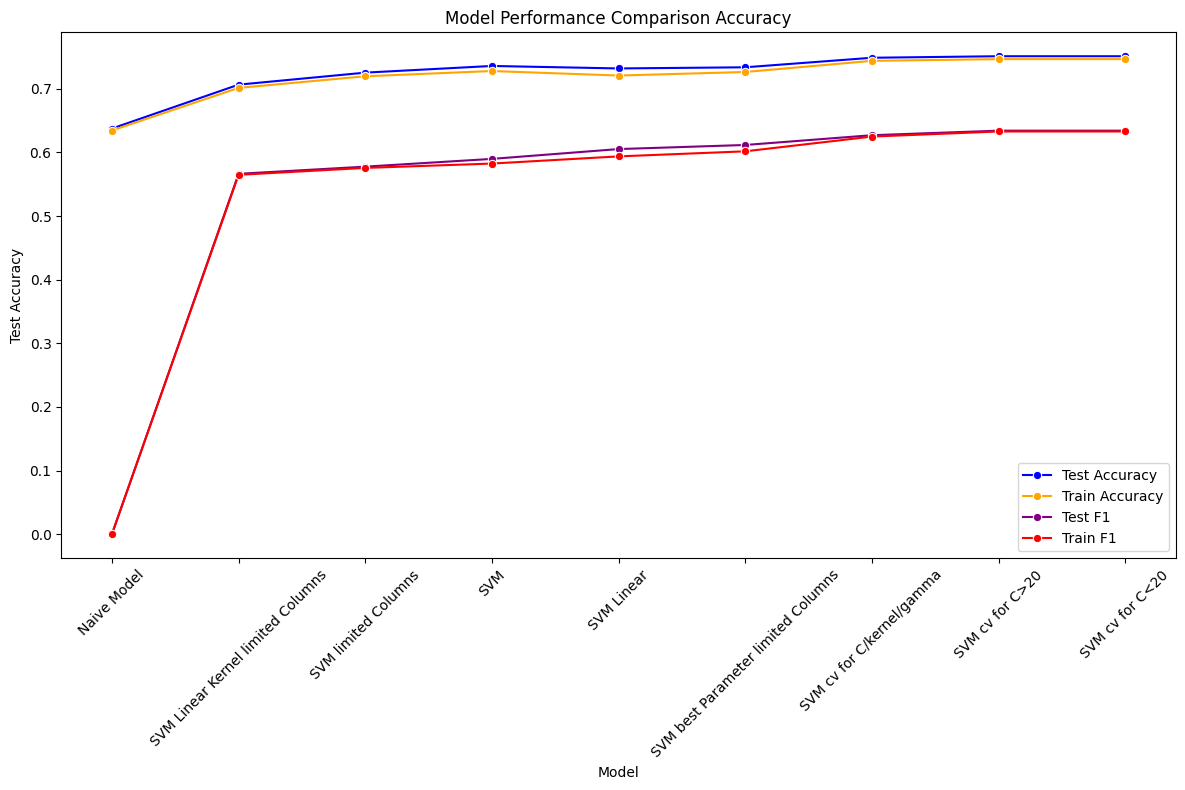

In [41]:
# Visualize model errors
model_errors_df = pd.DataFrame(SVM_model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])

# Sortierung nach Test Accuracy (aufsteigend)
model_errors_df = model_errors_df.sort_values(by='Test F1', ascending=True)

plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test Accuracy', data=model_errors_df, color='blue', label='Test Accuracy', marker='o')
sns.lineplot(x='Model', y='Train Accuracy', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
sns.lineplot(x='Model', y='Test F1', data=model_errors_df, color='purple', label='Test F1', marker='o')
sns.lineplot(x='Model', y='Train F1', data=model_errors_df, color='red', label='Train F1', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Model Evaluation

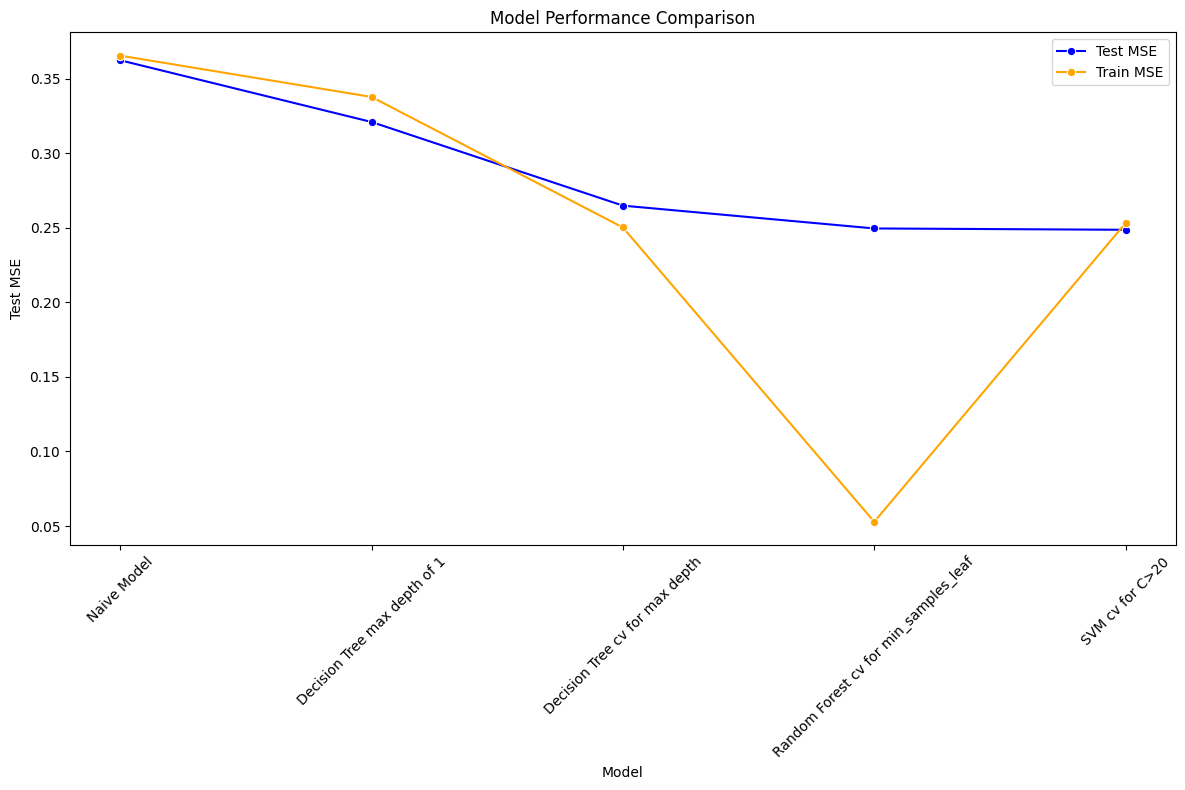

In [42]:
# Visualize model errors
model_errors_df = pd.DataFrame(model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
# Sortierung nach Test MSE (absteigend)
model_errors_df = model_errors_df.sort_values(by='Test MSE', ascending=False)
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test MSE', data=model_errors_df, color='blue', label='Test MSE', marker='o')
sns.lineplot(x='Model', y='Train MSE', data=model_errors_df, color='orange', label='Train MSE', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

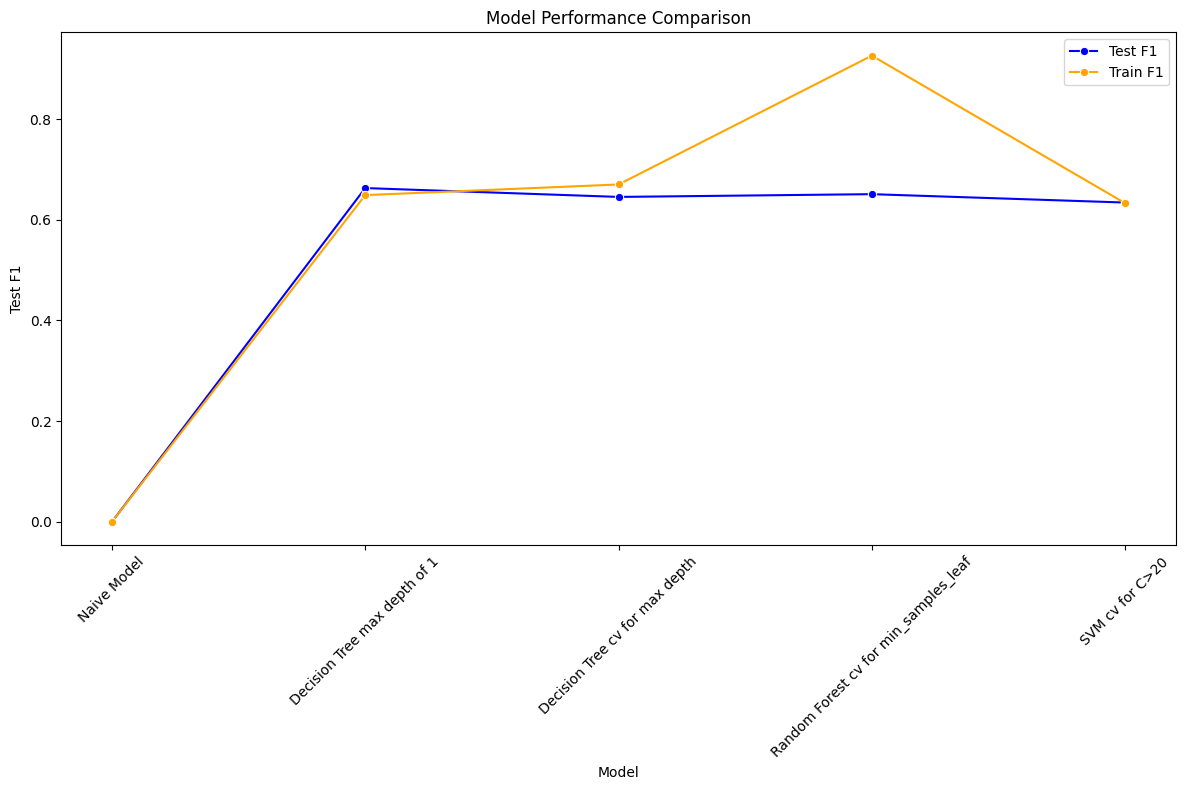

In [43]:
# Visualize model errors
model_errors_df = pd.DataFrame(model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
# Sortierung nach Test F1 (aufsteigend)
model_errors_df = model_errors_df.sort_values(by='Test Accuracy', ascending=True)
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test F1', data=model_errors_df, color='blue', label='Test F1', marker='o')
sns.lineplot(x='Model', y='Train F1', data=model_errors_df, color='orange', label='Train F1', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

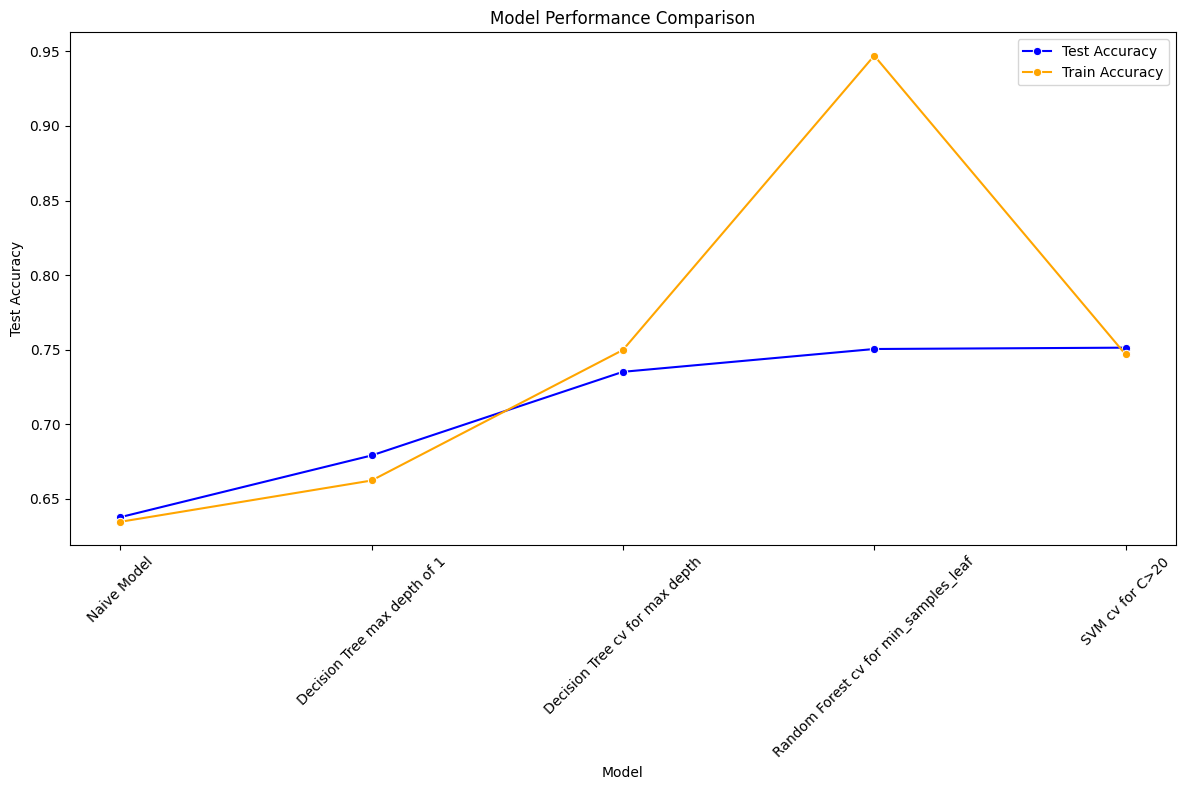

In [44]:
# Visualize model errors
model_errors_df = pd.DataFrame(model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
# Sortierung nach Test Accuracy (aufsteigend)
model_errors_df = model_errors_df.sort_values(by='Test Accuracy', ascending=True)
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test Accuracy', data=model_errors_df, color='blue', label='Test Accuracy', marker='o')
sns.lineplot(x='Model', y='Train Accuracy', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

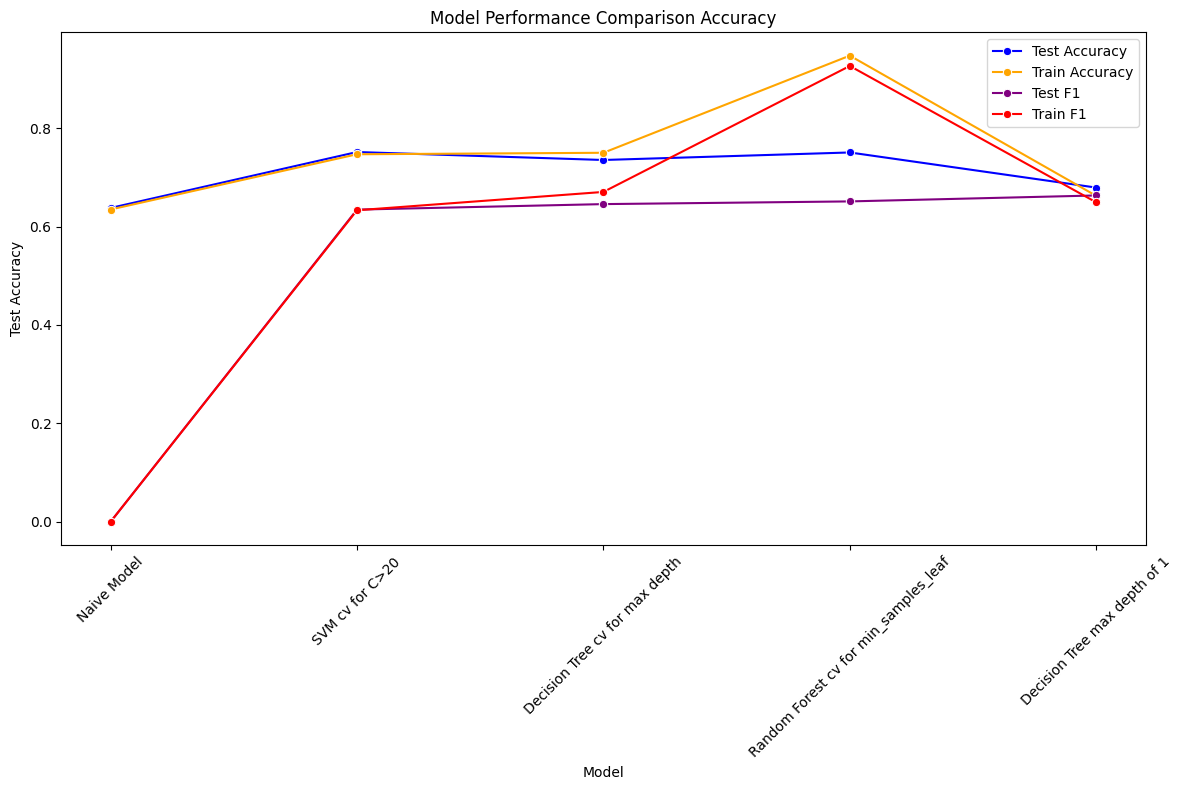

In [45]:
# Visualize model errors
model_errors_df = pd.DataFrame(model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])

# Sortierung nach Test Accuracy (aufsteigend)
model_errors_df = model_errors_df.sort_values(by='Test F1', ascending=True)

plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test Accuracy', data=model_errors_df, color='blue', label='Test Accuracy', marker='o')
sns.lineplot(x='Model', y='Train Accuracy', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
sns.lineplot(x='Model', y='Test F1', data=model_errors_df, color='purple', label='Test F1', marker='o')
sns.lineplot(x='Model', y='Train F1', data=model_errors_df, color='red', label='Train F1', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison Accuracy')
plt.legend()
plt.tight_layout()
plt.show()